<a href="https://colab.research.google.com/github/TanuRajput110/Mobile-price-range-prediction/blob/main/Copy_of_Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

##In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.




---



# **DATA DESCRIPTION**

##1. Battery_power - Total energy a battery can store in one time measured in mAh
##2. Blue - Has bluetooth or not
##3. Clock_speed - speed at which microprocessor executes instructions
##4. Dual_sim - Has dual sim support or not
##5. Fc - Front Camera mega pixels
##6. Four_g - Has 4G or not
##7. Int_memory - Internal Memory in Gigabytes
##8. M_dep - Mobile Depth in cm
##9. Mobile_wt - Weight of mobile phone
##10. N_cores - Number of cores of processor
##11. Pc - Primary Camera mega pixels
##12. Px_height - Pixel Resolution Height
##13. Px_width - Pixel Resolution Width
##14. Ram - Random Access Memory in Mega Bytes
##15. Sc_h - Screen Height of mobile in cm
##16. Sc_w - Screen Width of mobile in cm
##17. Talk_time - longest time that a single battery charge will last when you are
##18. Three_g - Has 3G or not
##19. Touch_screen - Has touch screen or not
##20. Wifi - Has wifi or not
##21. Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).



---



#**IMPORTING THE LIBRARIES**

In [1]:
# IMPORTING THE LIBRARIES AND MODULES
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# IMPORTING METRICS RELATED MODULE FROM SKLEARN LIBRARY
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,plot_confusion_matrix,classification_report,roc_auc_score,roc_curve, auc,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# MOUNTING WITH GOOGLE DRIVE 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# LOADING THE DATASET
data = pd.read_csv("/content/drive/MyDrive/Mobile Price Range Prediction - Tanu Rajput/mobile_price_range.csv")

In [4]:
# LET SEE THE FIRST FIVE ROWS OF THE DATASET
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# LAST FIVE ROWS OF THE DATASET
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
# DATASET INFORMATION
def information(data):
    print(f"Dataset Shape: {data.shape}")
    information = pd.DataFrame(data.dtypes,columns=['dtypes']).reset_index()
    information['Name'] = information['index']
    information= information[['Name','dtypes']]
    information['Missing'] = data.isnull().sum().values    
    information['Uniques'] = data.nunique().values
    return information
result = information(data).sort_values('Missing', ascending= False)
print(result)

Dataset Shape: (2000, 21)
             Name   dtypes  Missing  Uniques
0   battery_power    int64        0     1094
11      px_height    int64        0     1137
19           wifi    int64        0        2
18   touch_screen    int64        0        2
17        three_g    int64        0        2
16      talk_time    int64        0       19
15           sc_w    int64        0       19
14           sc_h    int64        0       15
13            ram    int64        0     1562
12       px_width    int64        0     1109
10             pc    int64        0       21
1            blue    int64        0        2
9         n_cores    int64        0        8
8       mobile_wt    int64        0      121
7           m_dep  float64        0       10
6      int_memory    int64        0       63
5          four_g    int64        0        2
4              fc    int64        0       20
3        dual_sim    int64        0        2
2     clock_speed  float64        0       26
20    price_range    int64   

In [7]:
# CHECKING DUPLICATE RECORDS
print(f'{data.duplicated().sum()} duplicate values in our dataset.')

0 duplicate values in our dataset.


In [8]:
# UNIQUE VALUES OF EACH COLUMN
for i in data.columns:
  print(f"UNIQUE VALUES of {i}")
  print(data[i].unique())
  print("\n")

UNIQUE VALUES of battery_power
[ 842 1021  563 ... 1139 1467  858]


UNIQUE VALUES of blue
[0 1]


UNIQUE VALUES of clock_speed
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]


UNIQUE VALUES of dual_sim
[0 1]


UNIQUE VALUES of fc
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]


UNIQUE VALUES of four_g
[0 1]


UNIQUE VALUES of int_memory
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]


UNIQUE VALUES of m_dep
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]


UNIQUE VALUES of mobile_wt
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89

In [9]:
# STATISTICAL INFORMATION
pd.DataFrame(data = data.describe().T)

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [10]:
# Let us see the names of the columns
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

###We can see that sc_width column and px_height column has minimum value 0 which is not possible in any mobile. **We need to handle this mismatch**


---


# **HANDLING MISMATCH VALUES**

# In px_height column

In [11]:
# Checking observations having px_hieght value as 0.
print(f"number of observation having px_height as 0 = {data[data['px_height']==0].shape[0]}")
# Checking observations having screen width value as 0.
print(f"number of observation having screen width value as 0 = {data[data['sc_w']==0].shape[0]}")

number of observation having px_height as 0 = 2
number of observation having screen width value as 0 = 180


In [12]:
#observation of px_height  having value 0
data[data['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [13]:
# As there are only 2 observations having px_height=0. so just drop it.
data.drop(data[data['px_height']==0].index, inplace=True)

In [14]:
# Rechecking the observation of px_height having value 0 after dropping 
data[data['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


# In sc_width column

In [15]:
# Checking observations having screen width value as 0.
print(f"number of observation having screen width value as 0 = {data[data['sc_w']==0].shape[0]}")

number of observation having screen width value as 0 = 179


### Observation: Earlier it was 181,but as we drop rows in px_height having value 0 then 2 rows from it also dropped. That's why it is 179 now.

###We will use KNN imputer method for imputation

In [16]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
data['sc_w']=data['sc_w'].replace(0,np.nan)

In [17]:
# import KNN imputer from sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
data=pd.DataFrame(impute_knn.fit_transform(data),columns=data.columns)

In [18]:
# Checking shape again
data.shape

(1998, 21)

In [19]:
# Rechecking observations of 'screen width' whether the zero values are removed or not.
print(f"number of observation having screen width value as 0 = {data[data['sc_w']==0].shape[0]}")

number of observation having screen width value as 0 = 0


## Hence, we handled our mismatch column successfully



---



# **OUTLIER TREATMENT**

In [20]:
# Checking the Outliers in 'fc' column 
Q1 = data["fc"].quantile(0.25)
Q3 = data['fc'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will consider datapoints before Q3.
data = data[(data['fc'] <= Q3)]

In [21]:
# Checking the Outliers in 'px_height' column
Q1 = data["px_height"].quantile(0.25)
Q3 = data['px_height'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will consider datapoints before Q3.
mobile_data = data[(data['px_height'] <= Q3)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


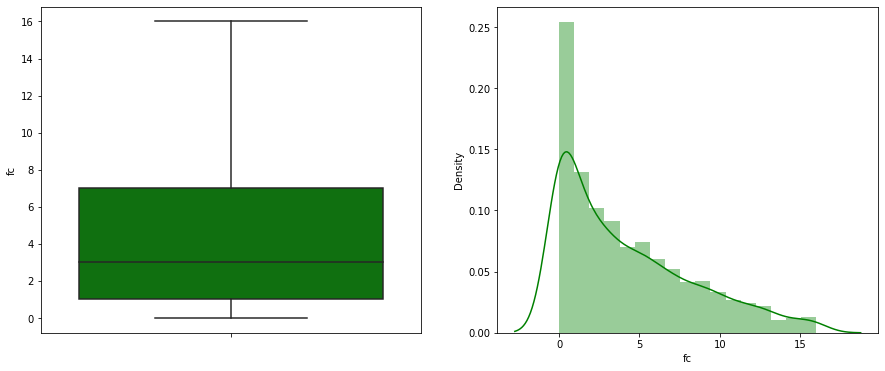

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


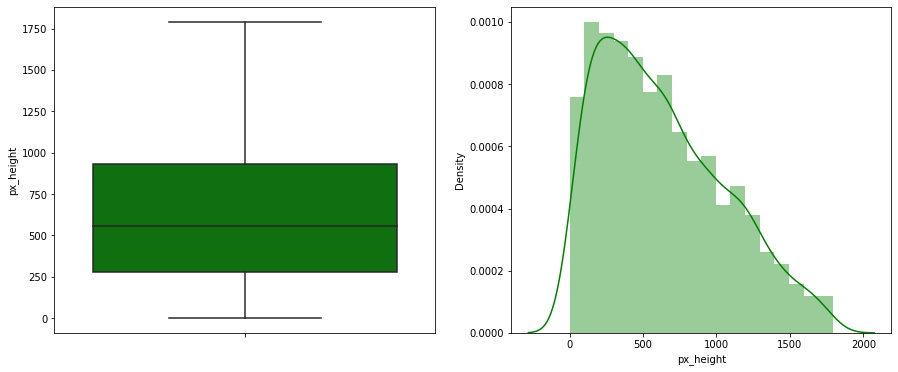

In [22]:
# let's see whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=mobile_data[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(mobile_data[var],color='green')
    
    fig.set_xlabel(var)

    plt.show()

## We have handled outliers properly.So, there are no outliers present in our dataset.



---



# **EXPLORATORY DATA ANALYSIS**

##1) Let's visualize the value counts/distribution of target variable => **'price_range'**

2.0    497
0.0    496
1.0    494
3.0    493
Name: price_range, dtype: int64
value counts of price_range  
AxesSubplot(0.260833,0.125;0.503333x0.755)


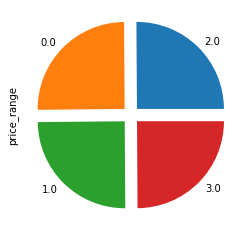

In [23]:
# Distribution of our target variable
print(data['price_range'].value_counts())
print(f"value counts of price_range  \n{data['price_range'].value_counts().plot(kind='pie', explode = [0.1,0.1,0.1,0.1])}")

###By seeing the piechart we can tell that our categorical values of target variable's distribution is equal.

###0=low cost

###1=medium cost

###2=high cost

###3=very high cost

##2) Distribution  of n_cores(no of core processor) and pc(primary camera mega pixel)

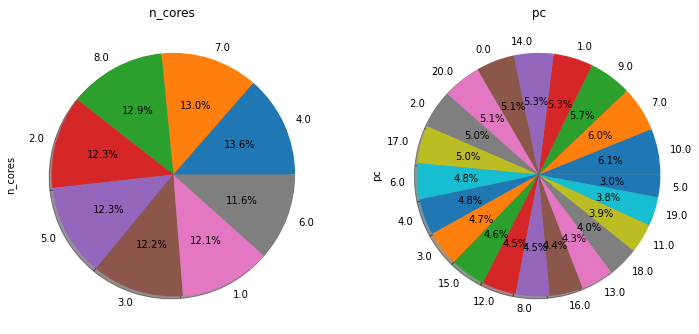

In [24]:
# Distribution of all core processors and PC
f,ax=plt.subplots(1,2,figsize=(12,12))
data['n_cores'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
data['pc'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)

ax[0].set_title('n_cores ')
ax[1].set_title(' pc ')

plt.show()

##3) Percentage Distribution of mobile with respect to 'three_g', 'four_g', 'blue', 'touch_screen', 'dual_sim'

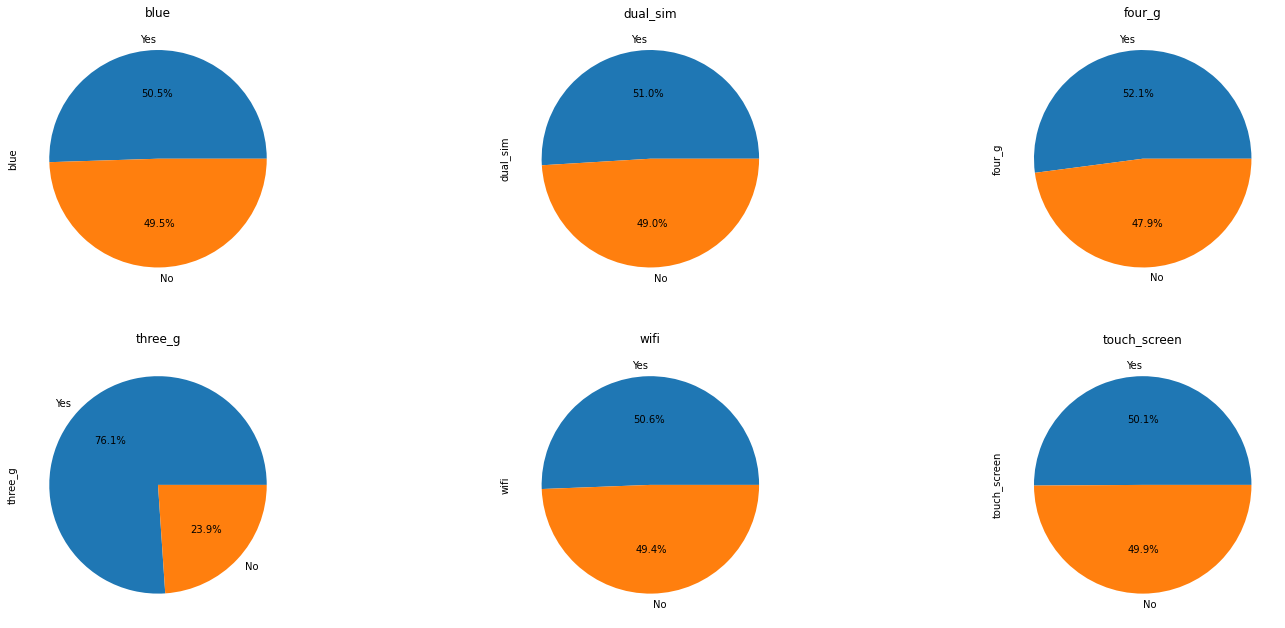

In [25]:
#let's see the percentage distribution of features supported and not supported in  mobile
columnss=['blue','dual_sim','four_g','three_g', 'wifi', 'touch_screen']
labels = ["Yes",'No']
n=1
plt.figure(figsize=(25,11))
for i in columnss:
  ax=plt.subplot(2,3,n)
  
  n=n+1
  data[i].value_counts().plot.pie(autopct='%.1f%%', labels=labels)
  ax.set_title(i)




##Observation
####1) Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreen are almost **50%**.

####2) 
####a. YES means SUPPORTED
  ####   b. NO means NOT SUPPORTED

####3) Very few mobiles(**23.9%**) do not have Three_g.

##4) Distribution of mobile features (['ram','battery_power','px_height','px_width']) wrt price range.

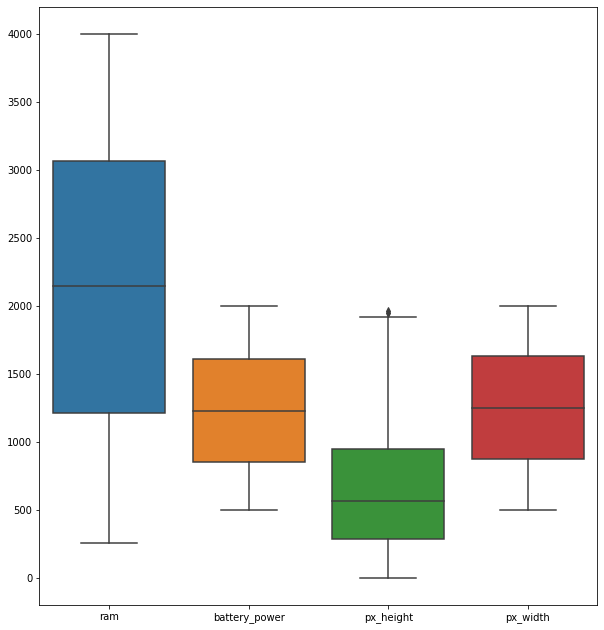

In [26]:
# Distribution of the ram, battery_power, px_height, px_width using BOXPLOT
plt.figure(figsize=(10,11))
sns.boxplot(data=data[['ram','battery_power','px_height','px_width']])
plt.show()

## 5) Price_Range VS ram, battery power, px_height, px_width

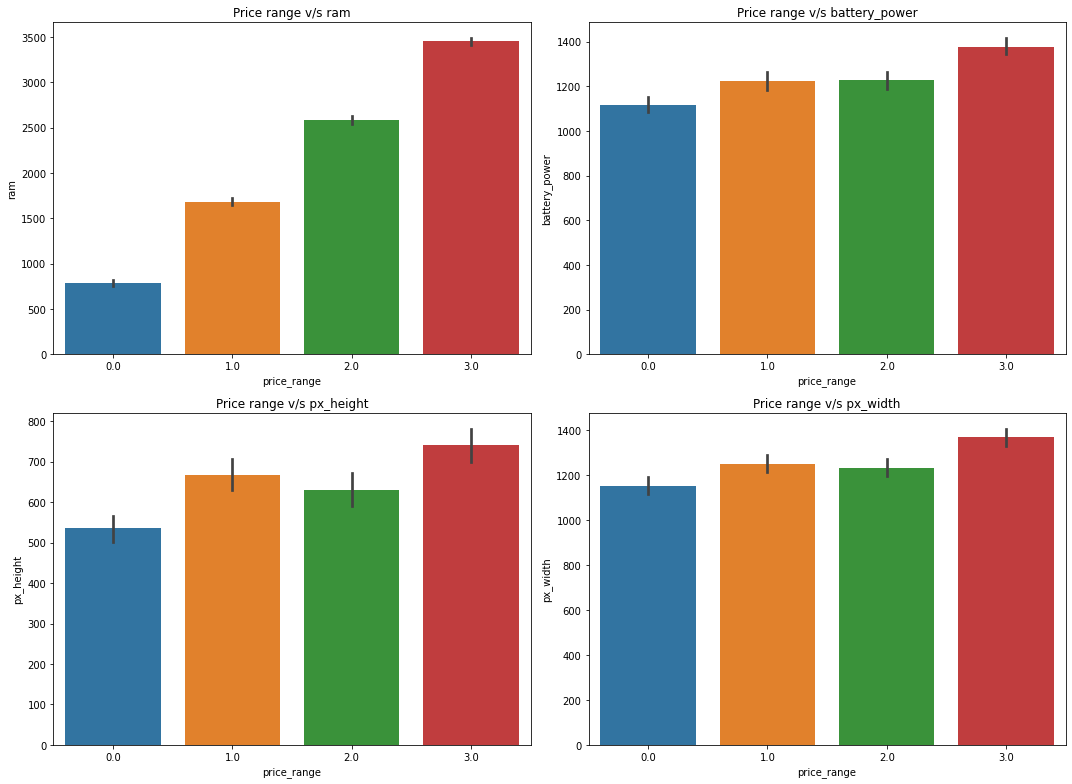

In [27]:
# Count of the mobile phones with values of Target variable wrt ram, battery_power, px_height, px_width
attributes=['ram','battery_power','px_height','px_width']
plt.figure(figsize=(15,11))
c=1
for i in attributes:
  plt.subplot(2,2,c)
  sns.barplot(x=data['price_range'],y=data[i])
  plt.title(f'Price range v/s {i}')
  c=c+1
  plt.tight_layout()

##Observation:
                
#### 1. Mobiles having RAM more than 3 GB falls under Very high cost category. As RAM increases price range also increases.

#### 2. Mobiles having RAM less than 1000 MB falls under low cost category. Mobiles with battery power more than 1300 mAh has very high cost. 

#### 3. Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category. Mobiles with more than 700 pixel height and width more than 1300 has very high cost.

## 6) Count of mobiles in each price range with supporting or not supporting specifications.

In [28]:
# Checking the counts of binary categorical variables by grouping price range.
price_group=data.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'})

Text(0, 0.5, 'Count of phones')

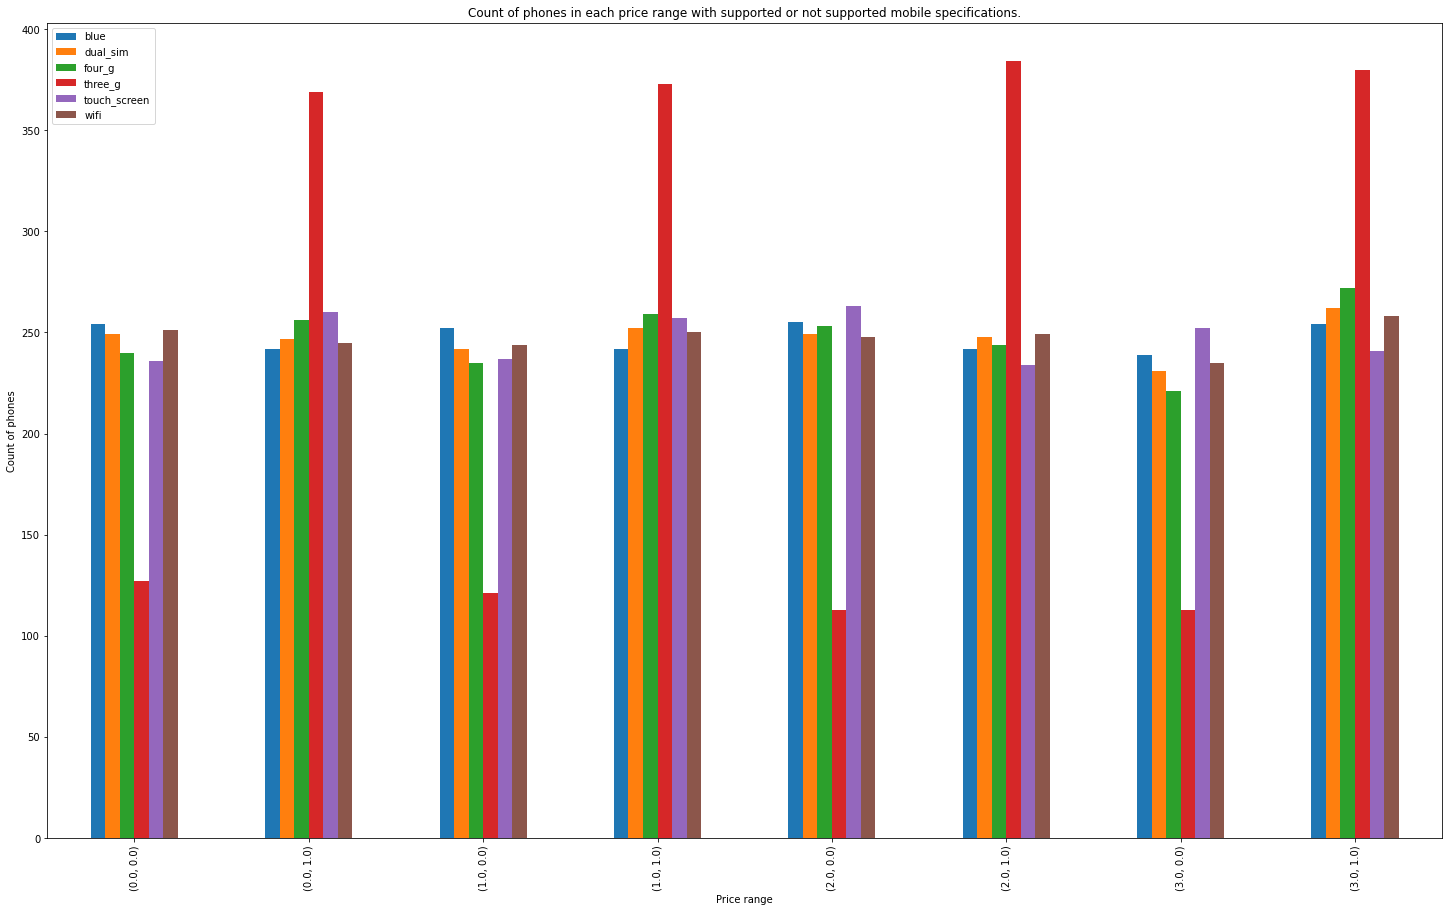

In [29]:
# visualising by plotting barchat.
# plt.figure(figsize=(12,6))
price_group.plot.bar(figsize=(25,15))
plt.title('Count of phones in each price range with supported or not supported mobile specifications.')
plt.xlabel('Price range')
plt.ylabel('Count of phones')


##Observation:
### Each price range category has equal number of mobiles having both supporting and non supporting specifications.

##7) Count of mobiles for each n_cores and m_dep wrt price _range

<Figure size 1800x792 with 0 Axes>

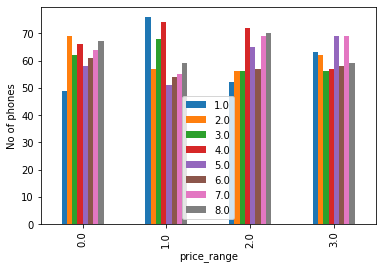

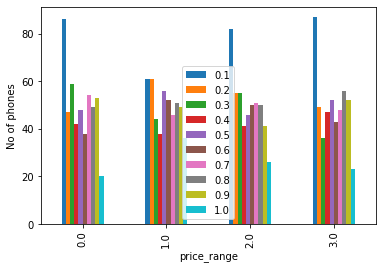

In [30]:

c=["n_cores","m_dep"]
plt.figure(figsize=(25,11))
n = 1
for i in c:
  data.groupby(['price_range'])[i].value_counts().unstack().plot(kind='bar')
  plt.legend()
  plt.xlabel('price_range')
  plt.ylabel('No of phones')

###Observation


####1. There are very few mobiles in price range 0 and 1 with lesser number of cores.

####2. Most of the mobiles in price range 2 and 3 are with high no of cores. The count of mobiles contains cores 5.0, 7.0, and 8.0 is high.

####3. Number of phones with less thickness is high and count of phones with high thickness is low.

## 8) Count of mobles contain 3G and 4G features.

## Having 3g and 4g

In [31]:
# lets select data only of mobiles with having 3G and 4G feature
having_3g4g=data[(data['three_g']==1) & (data['four_g']==1)]

In [32]:
#count of each price range values of the mobiles whom having 3G and 4G features.
print("Count of mobile price range having 3g and 4g\n")
having_3g4g['price_range'].value_counts()

Count of mobile price range having 3g and 4g



3.0    272
1.0    259
0.0    256
2.0    244
Name: price_range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


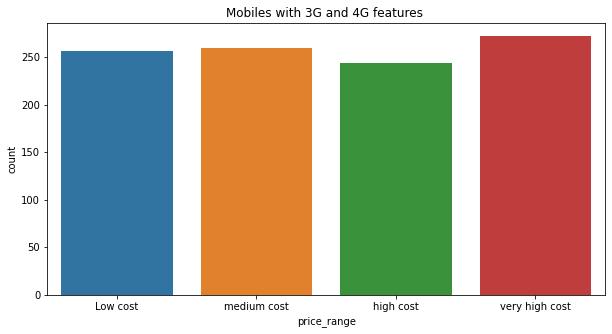

In [33]:
# lets plot the bar chart of price range vs having 3G and 4G
plt.figure(figsize=(10,5))
sns.countplot(having_3g4g['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 3G and 4G features ")
plt.show()

##Not having 3G and 4G

In [34]:
# selecting data only of mobiles with not having 3G and 4G feature
not_having_3g4g=data[(data['three_g']!=1) & (data['four_g']!=1)]

In [35]:
#count of each price range values of the mobiles whom don't have 3G and 4G features.
print("value_counts of mobile price range not having 3g and 4g\n")
not_having_3g4g['price_range'].value_counts()

value_counts of mobile price range not having 3g and 4g



0.0    127
1.0    121
3.0    113
2.0    113
Name: price_range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


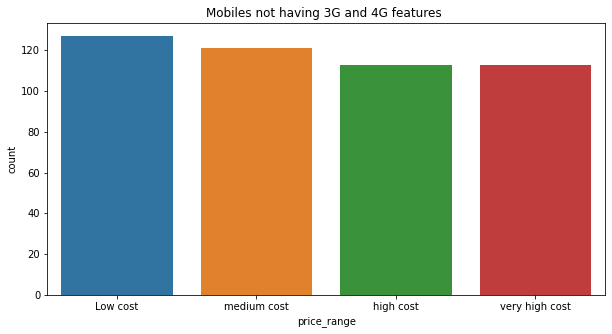

In [36]:
# Let's plot the bar chart of price range vs not having 3G and 4G
plt.figure(figsize=(10,5))
sns.countplot(not_having_3g4g['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles not having 3G and 4G features ")
plt.show()

## Observation:

#### In the first plot, count of mobiles which contains 3G and 4G features is high and this falls under VERY HIGH COST 'Price_range' category

#### In the second plot, count of mobiles which does not contains 3G adn 4G features is high which falls under VERY LOW COST 'price_range' category.



## 9) How price effects based on number of cores.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'n_cores v/s Price range')

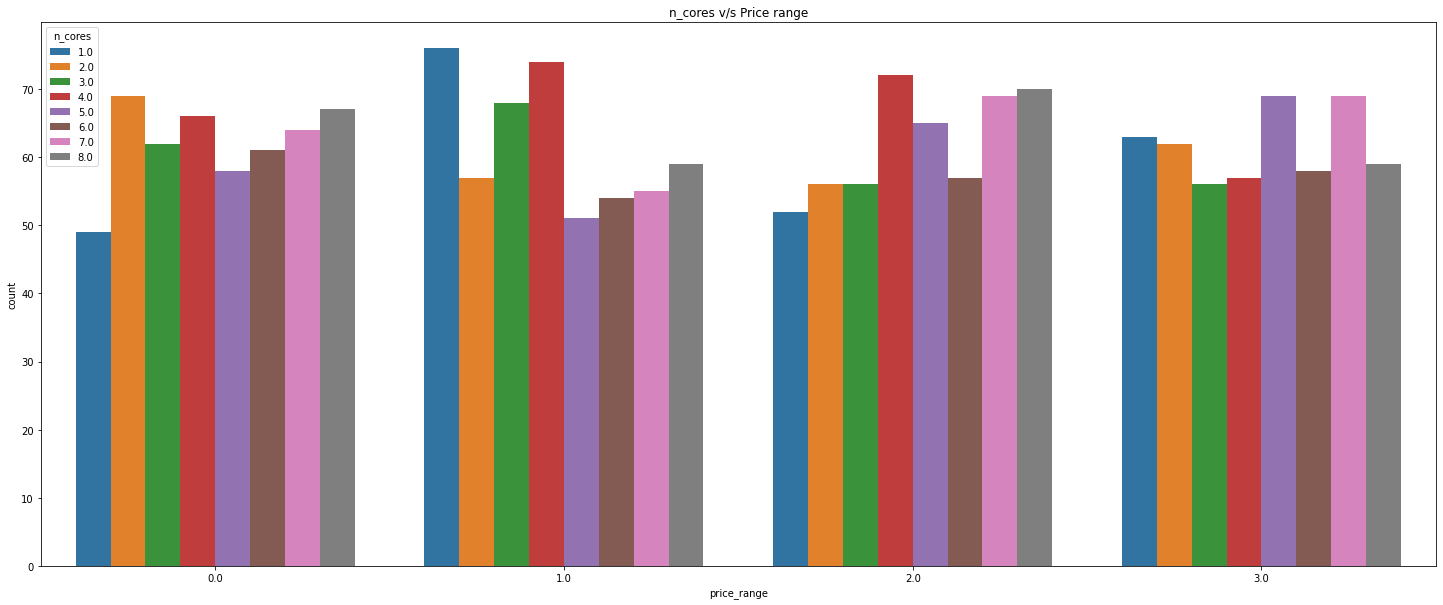

In [37]:
# counting the number of cores which was affected by price_range
plt.figure(figsize=(25,10))
sns.countplot(data['price_range'],hue=data['n_cores'])
plt.title("n_cores v/s Price range")


## Observation

#### 1. Price range 0 have majority of phones with 2 core processors.

#### 2. Price range 1 have majority of phones with 1 and 4 core processors.

#### 3. Price range 2 have majority of phones with 4 core processors

#### 4. Price range 3 have majority of phones with 5 and 7 core processors

## 10) Seeing whether our dataset is balanced or not wrt Price_Range

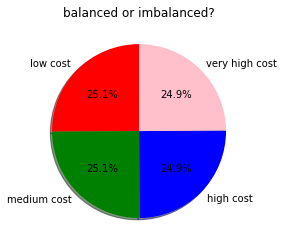

In [38]:
# Creating piechart to see the 
labels_of_price_range = ["low cost", "medium cost", "high cost", "very high cost"]
values = data['price_range'].value_counts().values
colors = ['red','green','blue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels_of_price_range, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('balanced or imbalanced?')
plt.show()

## Observation
#### Looks like our dataset is balanced with respect to Price range